In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [2]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Date range
date_range = pd.date_range(start='2019-01-01', end='2023-12-31', freq='M')

# Generate sample sales data
def generate_sales_data(base, seasonality, trend, noise_level=0.1):
    n = len(date_range)
    trend_component = trend * np.arange(n)
    seasonality_component = seasonality * np.sin(np.linspace(0, 2 * np.pi * 5, n))  # Seasonality over 5 years
    noise = noise_level * np.random.randn(n) * base
    sales = base + trend_component + seasonality_component + noise
    return sales

# Parameters
base_sales = 500  # Base sales value
trend = 5  # Trend component
seasonality = 100  # Seasonality component

# Generate data
sales_data = generate_sales_data(base_sales, seasonality, trend)

# Create DataFrame
sales_df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})

# Ensure no negative sales
sales_df['Sales'] = sales_df['Sales'].apply(lambda x: max(x, 0))

print(sales_df.head())

        Date       Sales
0 2019-01-31  524.835708
1 2019-02-28  548.853365
2 2019-03-31  629.860735
3 2019-04-30  691.116054
4 2019-05-31  593.065774


In [3]:
sales_df.shape

(60, 2)

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Sales   60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [5]:
sales_df['Sales'].sum()

38386.03595078853

Text(0.5, 1.0, 'Earbuds R1')

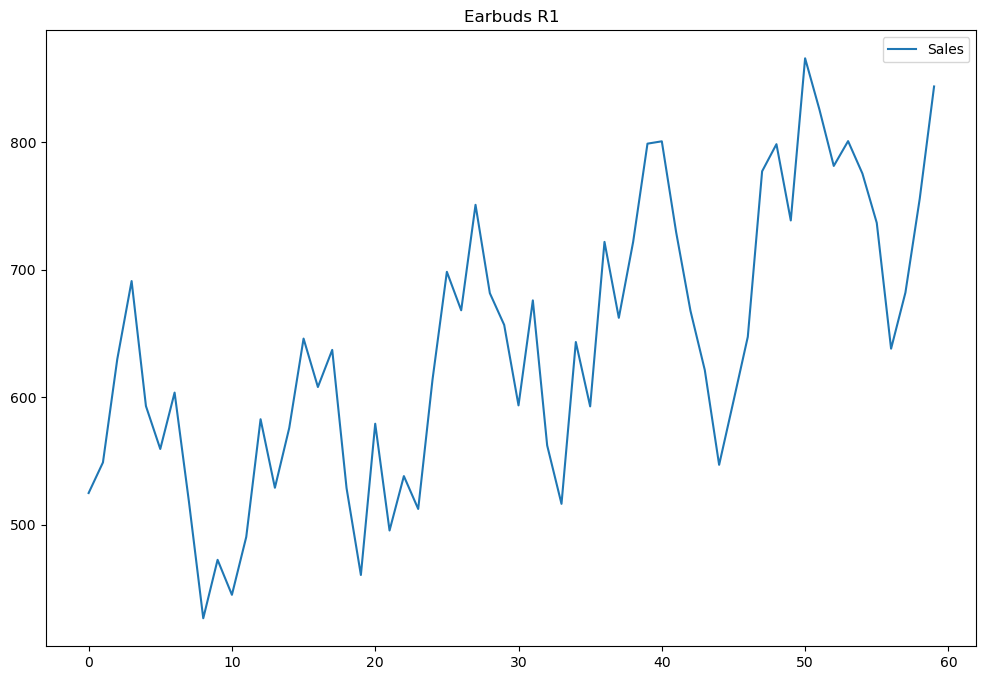

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_df)
plt.title('Earbuds R1')

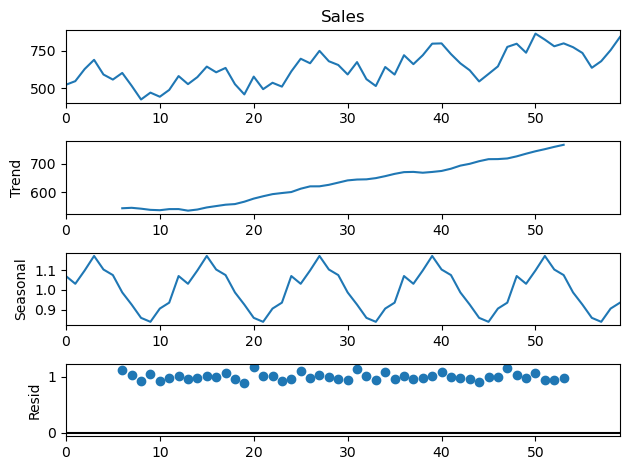

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_df['Sales'], model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()


In [9]:
train= sales_df[:57]
test=sales_df[57:]

In [10]:
len(train)

57

In [12]:
model=ExponentialSmoothing(train['Sales'],trend='add', seasonal='mul', seasonal_periods=12).fit()

In [13]:
pred=model.forecast(3)

In [14]:
pred

57    645.831674
58    709.218978
59    744.631529
dtype: float64

Text(0.5, 1.0, 'Earbuds R1')

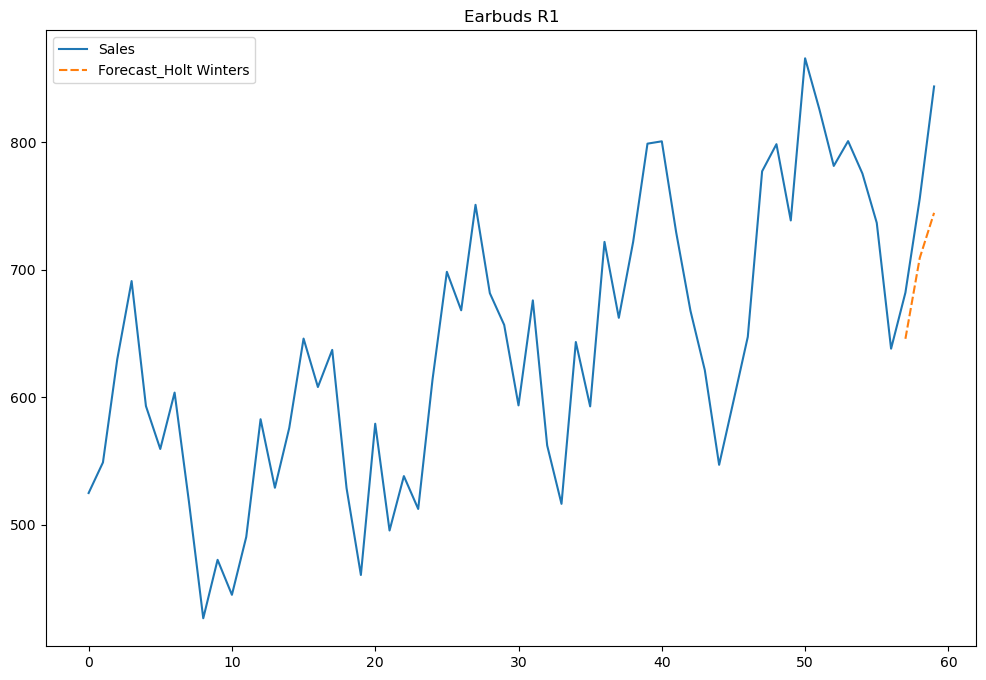

In [15]:
sales_df['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12,8))
sns.lineplot(sales_df)
plt.title('Earbuds R1')

In [17]:
mae= mean_absolute_error(test['Sales'],pred)
mse=mean_squared_error(test['Sales'], pred)
mape= mean_absolute_percentage_error(test['Sales'],pred)
rmse= np.sqrt(mean_squared_error(test['Sales'], pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 60.65157988850327
MAPE - Holt Winters: 0.07741657938213507
MSE - Holt Winters: 4437.35453331306
RMSE - Holt Winters: 66.61347110992685


# FORECASTING

In [18]:
model_f=ExponentialSmoothing(sales_df['Sales'],trend='add', seasonal='mul', seasonal_periods=12).fit()

In [19]:
pred_f=model.forecast(3)

In [20]:
pred_f

57    645.831674
58    709.218978
59    744.631529
dtype: float64

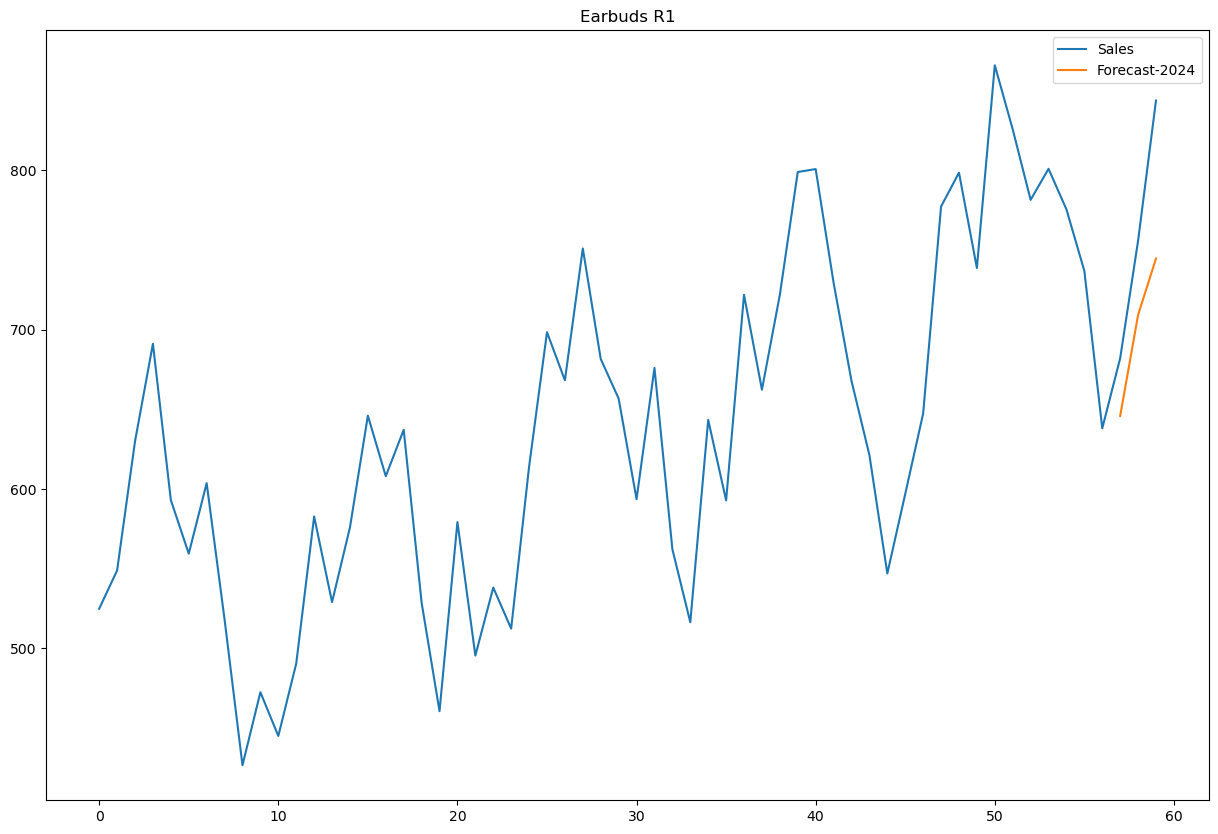

In [21]:
plt.figure(figsize=(15, 10))
sns.lineplot(sales_df[['Sales']])
sns.lineplot(pred_f,label='Forecast-2024')
plt.title('Earbuds R1')
plt.show()